## Import

In [73]:
import io
import os, sys
from scipy import stats
import numpy as np
import numpy
from google.colab import files
import pandas as pd
import csv
from google.colab import drive
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from collections import defaultdict
import tensorflow as tf
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Data

In [74]:
df = pd.read_excel(r'/content/drive/MyDrive/97.xlsx', index_col=0, engine='openpyxl')

In [75]:
df.ndim

2

In [76]:
y = df.pop('Health')
x = df.copy()

In [77]:
df.shape

(38579, 22)

In [78]:
x_,x_test, y_,y_test= train_test_split(x,y,test_size=0.4)
x_train,x_val, y_train,y_val=train_test_split(x_,y_,test_size=0.5)

In [79]:
x_train.shape

(11573, 22)

In [80]:
x_test.shape

(15432, 22)

In [81]:
x_val.shape

(11574, 22)

In [84]:
x_train = np.asarray(x_train).astype("int64")
y_train = np.asarray(y_train).astype("int64")

## Normalize

In [85]:
from tensorflow.keras.layers import IntegerLookup
from tensorflow.keras.layers import Normalization
from tensorflow.keras.layers import StringLookup


def encode_numerical_feature(feature, name, dataset):
    # Create a Normalization layer for our feature
    normalizer = Normalization()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    encoded_feature = normalizer(feature)
    return encoded_feature


def encode_categorical_feature(feature, name, dataset, is_string):
    lookup_class = StringLookup if is_string else IntegerLookup
    # Create a lookup layer which will turn strings into integer indices
    lookup = lookup_class(output_mode="binary")

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the set of possible string values and assign them a fixed integer index
    lookup.adapt(feature_ds)

    # Turn the string input into integer indices
    encoded_feature = lookup(feature)
    return encoded_feature

## Model Design

In [86]:
model = Sequential(
       [
       layers.Flatten(input_shape=(3000, 26)),
       layers.Dense(120, activation='relu'),
       layers.Dense(80, activation='relu'),
       layers.Dense(3, activation='softmax')
   ]
   )
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 78000)             0         
                                                                 
 dense_9 (Dense)             (None, 120)               9360120   
                                                                 
 dense_10 (Dense)            (None, 80)                9680      
                                                                 
 dense_11 (Dense)            (None, 3)                 243       
                                                                 
Total params: 9,370,043
Trainable params: 9,370,043
Non-trainable params: 0
_________________________________________________________________


## Training

In [87]:
from tensorflow.keras import losses, optimizers
model.compile(loss=losses.sparse_categorical_crossentropy,
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

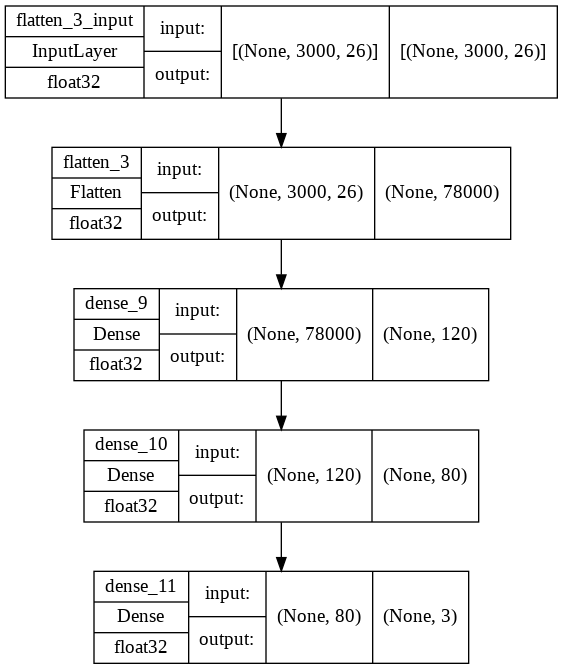

In [90]:
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True)

In [91]:
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=128,
                  validation_data=(x_val, y_val)
                    )

Epoch 1/30


ValueError: ignored

## Evaluation

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'][1:], label='Train Loss')
plt.plot(history.history['val_loss'][1:], label='Valid Loss')
plt.legend()

NameError: ignored